In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression# r2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv('FuelConsumptionCo2.csv')
dataset.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
dataset.shape

(1067, 12)

In [4]:
dataset.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# ENGINESIZE is the dependent variable that we want to explain and FUELCONSUMPTION_CITY is the independent variable
X = dataset.iloc[:,[3]].values
y = dataset.iloc[:,[-1]].values

In [6]:
X

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [7]:
y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

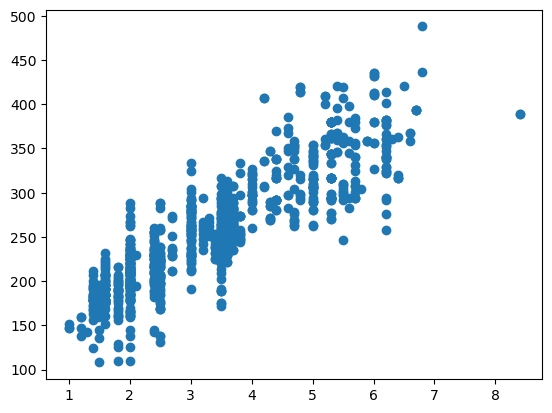

In [8]:
# check the visualisation of the pattern between the data
plt.scatter(X, y)
plt.show()

In [9]:
#X test is the 20% of rows the rest 80% is the training test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=1)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 1)
(267, 1)
(800, 1)
(267, 1)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([[242.88082083],
       [179.60282889],
       [203.33207587],
       [203.33207587],
       [306.15881277],
       [242.88082083],
       [203.33207587],
       [195.42232688],
       [242.88082083],
       [219.15157386],
       [219.15157386],
       [242.88082083],
       [219.15157386],
       [329.88805975],
       [223.10644835],
       [223.10644835],
       [187.51257789],
       [298.24906378],
       [262.65519331],
       [219.15157386],
       [361.52705572],
       [223.10644835],
       [270.56494231],
       [262.65519331],
       [270.56494231],
       [242.88082083],
       [171.6930799 ],
       [341.75268324],
       [187.51257789],
       [203.33207587],
       [242.88082083],
       [329.88805975],
       [262.65519331],
       [333.84293425],
       [282.42956579],
       [333.84293425],
       [369.43680471],
       [183.55770339],
       [290.33931479],
       [254.74544432],
       [242.88082083],
       [373.39167921],
       [203.33207587],
       [266

In [13]:
model.predict([[3]])

array([[242.88082083]])

In [14]:
#  βο
model.intercept_

array([124.23458595])

In [15]:
#  β1
model.coef_

array([[39.54874496]])

In [16]:
r2_score(y_test, y_pred)

0.7633265438534859

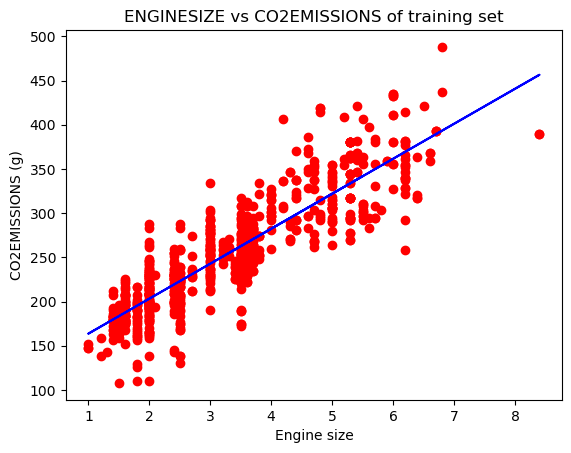

In [17]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('ENGINESIZE vs CO2EMISSIONS of training set')
plt.xlabel('Engine size')
plt.ylabel('CO2EMISSIONS (g)')
plt.show()

In [28]:
mean_squared_error(y_test, y_pred,squared=False)

30.77802766989429

In [55]:
print('Mean Squared Error :', mean_squared_error(y_test, y_pred,squared=False))
print('R2 score : ', r2_score(y_test, y_pred))

Mean Squared Error : 30.77802766989429
R2 score :  0.7633265438534859


In [56]:
#X test is the 25% of rows the rest 80% is the training test
#2nd model
X2 = dataset.iloc[:,[3,4]].values
y2 = dataset.iloc[:,[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.25,random_state=1)
#  βο
model.intercept_
#  β1
model.coef_
# run a linear to the dataset
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_2 = model.predict(X_test)
print('Mean Squared Error :', mean_squared_error(y_test, y_pred_2,squared=False))
print('R2 score : ', r2_score(y_test, y_pred_2))

Mean Squared Error : 29.897804494894643
R2 score :  0.7766702515976937


In [60]:
model.predict([[3,10]])

array([[281.64134705]])

In [61]:
#3nd model
X3 = dataset.iloc[:,[3,4,9]].values
y3 = dataset.iloc[:,[-1]].values

In [67]:
#X test is the 25% of rows the rest 80% is the training test
#3rd model
X3 = dataset.iloc[:,[3,4,9]].values
y3 = dataset.iloc[:,[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.25,random_state=1)
# run a linear to the dataset
model = LinearRegression()
model.fit(X_train, y_train)
#  βο
model.intercept_
#  β1
model.coef_

y_pred_3 = model.predict(X_test)
print('Mean Squared Error :', mean_squared_error(y_test, y_pred_3,squared=False))
print('R2 score : ', r2_score(y_test, y_pred_3))

Mean Squared Error : 23.778337702109724
R2 score :  0.8587361746188314


In [68]:
model.predict([[3,10,9]])

array([[255.79243263]])

In [70]:
#4th model
#X test is the 25% of rows the rest 80% is the training test
X4 = dataset.iloc[:,[3,4,7,9]].values
y4 = dataset.iloc[:,[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.25,random_state=1)
# run a linear to the dataset
model = LinearRegression()
model.fit(X_train, y_train)
#  βο
model.intercept_
#  β1
model.coef_

y_pred_4 = model.predict(X_test)
print('Mean Squared Error :', mean_squared_error(y_test, y_pred_4,squared=False))
print('R2 score : ', r2_score(y_test, y_pred_4))

Mean Squared Error : 23.81594038560859
R2 score :  0.8582890366348139


In [72]:
model.predict([[3,10,5,9]])

array([[238.14053529]])

In [73]:
#5th model
#X test is the 25% of rows the rest 80% is the training test
X5 = dataset.iloc[:,[3,4,7,8,9]].values
y5 = dataset.iloc[:,[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size = 0.25,random_state=1)
# run a linear to the dataset
model = LinearRegression()
model.fit(X_train, y_train)
#  βο
model.intercept_
#  β1
model.coef_

y_pred_5 = model.predict(X_test)
print('Mean Squared Error :', mean_squared_error(y_test, y_pred_5,squared=False))
print('R2 score : ', r2_score(y_test, y_pred_5))

Mean Squared Error : 23.83049166125337
R2 score :  0.8581158160767347


We see that after the 3rd model while adding features increases the R2 score, the difference is minimal compared to the 3rd model. Therefore, adding more features than 3 is not efficient for the model.